# Proyecto 3: Agrupación de datos sobre obesidad
## Integrantes
*
**Jonathan Alonso**
*
**Jheison Torres**

El objetivo es estimar el nivel de obesidad de individuos de Mexico, Peru y Colombia basado en los hábitos alimenticios y su condición física. A continuación se presentan los atributos.

| Atributo                                      | Descripción                                                                                                                                     |
|:--------------------------------------------------------|:------------------------------------------------------------------------------------------------------------------------------------------------|
| Consumo frecuente de alimentos altos en calorías (FAVC) | Consumo frecuente de alimentos altos en calorías                                                                                                |
| Frecuencia de consumo de vegetales (FCVC)               | Frecuencia de consumo de vegetales                                                                                                              |
| Número de comidas principales (NCP)                     | Número de comidas principales al día                                                                                                            |
| Consumo de alimentos entre comidas (CAEC)               | Consumo de alimentos entre las comidas principales                                                                                              |
| Consumo diario de agua (CH20)                           | Cantidad diaria de agua consumida                                                                                                               |
| Consumo de alcohol (CALC)                               | Frecuencia del consumo de alcohol                                                                                                               |
| Monitoreo de consumo de calorías (SCC)                  | Monitoreo de las calorías consumidas                                                                                                            |
| Frecuencia de actividad física (FAF)                    | Frecuencia de actividad física realizada                                                                                                        |
| Tiempo usando dispositivos tecnológicos (TUE)           | Tiempo dedicado al uso de dispositivos tecnológicos                                                                                             |
| Medio de transporte usado (MTRANS)                      | Medio de transporte utilizado                                                                                                                   |
| Género                                                  | Género de la persona                                                                                                                            |
| Edad                                                    | Edad de la persona                                                                                                                              |
| Altura                                                  | Altura de la persona                                                                                                                            |
| Peso                                                    | Peso de la persona                                                                                                                              |
| Antecedentes familiares de sobrepeso                    | Antecedentes de sobrepeso en la familia                                                                                                         |
| Fuma                                                    | Fumador o no                                                                                                                                    |
| NObesidad                                               | Nivel de obesidad: Peso Insuficiente, Peso Normal, Sobrepeso Nivel I, Sobrepeso Nivel II, Obesidad Tipo I, Obesidad Tipo II y Obesidad Tipo III |


In [1]:
#importar librerias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [49]:
#cargar dataset
df=pd.read_csv('../Datos/ObesityDataSet_raw_and_data_sinthetic.csv')

In [50]:
#valida primeros registros
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [51]:
#informacion DF
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [52]:
#cantidad de filas y columnas
df.shape

(2111, 17)

En total tenemos 2111 registros y 17 columnas

In [28]:
#variables categoricas
categoricas=df.select_dtypes(include=['object']).columns.tolist()
print('Variables cualitativas:', categoricas)

#variables numericas
numericas=df.select_dtypes(include=['float64']).columns.tolist()
print('Variables numericas:', numericas)

Variables cualitativas: ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']
Variables numericas: ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']


Dentro de las variables tenemos:
### Cualitativas
* Gender
* family_history_with_overweight
* FAVC
* CAEC
* SMOKE
* SCC
* CALC
* MTRANS
* NObeyesdad

### Numericas
* Age
* Height
* Weight
* FCVC
* NCP
* CH2O
* FAF
* TUE

### A su vez podemos distribuir los atributos relacionados con los hábitos alimenticios:

* Consumo frecuente de alimentos altos en calorías (FAVC)
* Frecuencia de consumo de vegetales (FCVC)
* Número de comidas principales (NCP)
* Consumo de alimentos entre comidas (CAEC)
* Consumo diario de agua (CH20)
* Consumo de alcohol (CALC)
  
### Los atributos relacionados con la condición física son:

* Monitoreo de consumo de calorías (SCC)
* Frecuencia de actividad física (FAF)
* Tiempo usando dispositivos tecnológicos (TUE)
* Medio de transporte usado (MTRANS)
  
### Otros atributos son:
* Género
* Edad
* Altura
* Peso
* Antecedentes familiares de sobrepeso
* Fuma
* Nivel de obesidad: Peso Insuficiente, Peso Normal, Sobrepeso Nivel I, Sobrepeso Nivel II, Obesidad Tipo I, Obesidad Tipo II y Obesidad Tipo III

In [30]:
#valida estadisticos
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


Observando las estadísticas descritas anteriormente, se identifca que las variables Edad, peso, FCVC y NCP presentan asímetria. Por otra parte, el promedio de la edad es 24.3 y el peso es de 86.58.

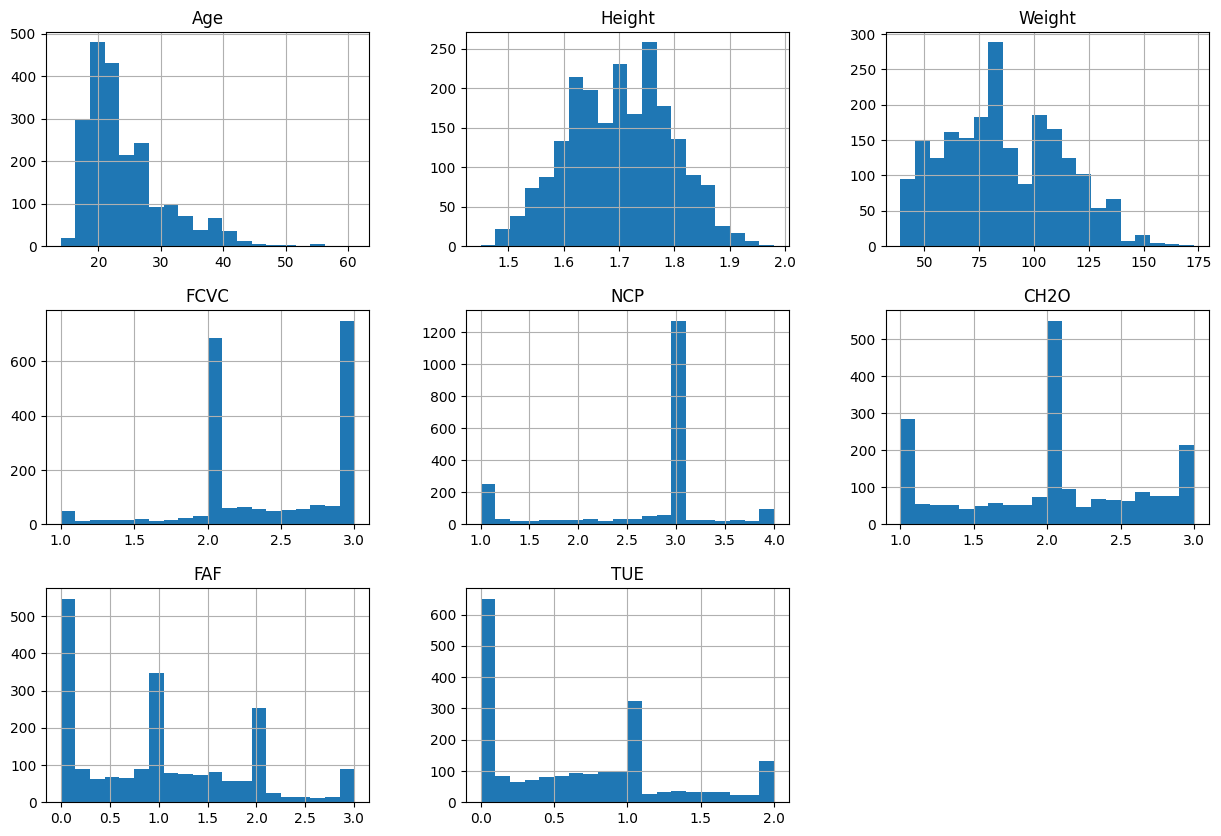

In [52]:
#histograma
df.hist(figsize=(15,10), bins=20)
plt.show()

Los diagramas anteriores representan la frecuencia de cada valor continuo.

* Tenemos un número máximo de personas entre 20 y 30 años.
* La frecuencia de la actividad física varía y hay muy pocas personas que hacen ejercicio a diario.
* Más de 1200 personas prefieren tres comidas principales.
* La frecuencia del consumo de vegetales es alta.

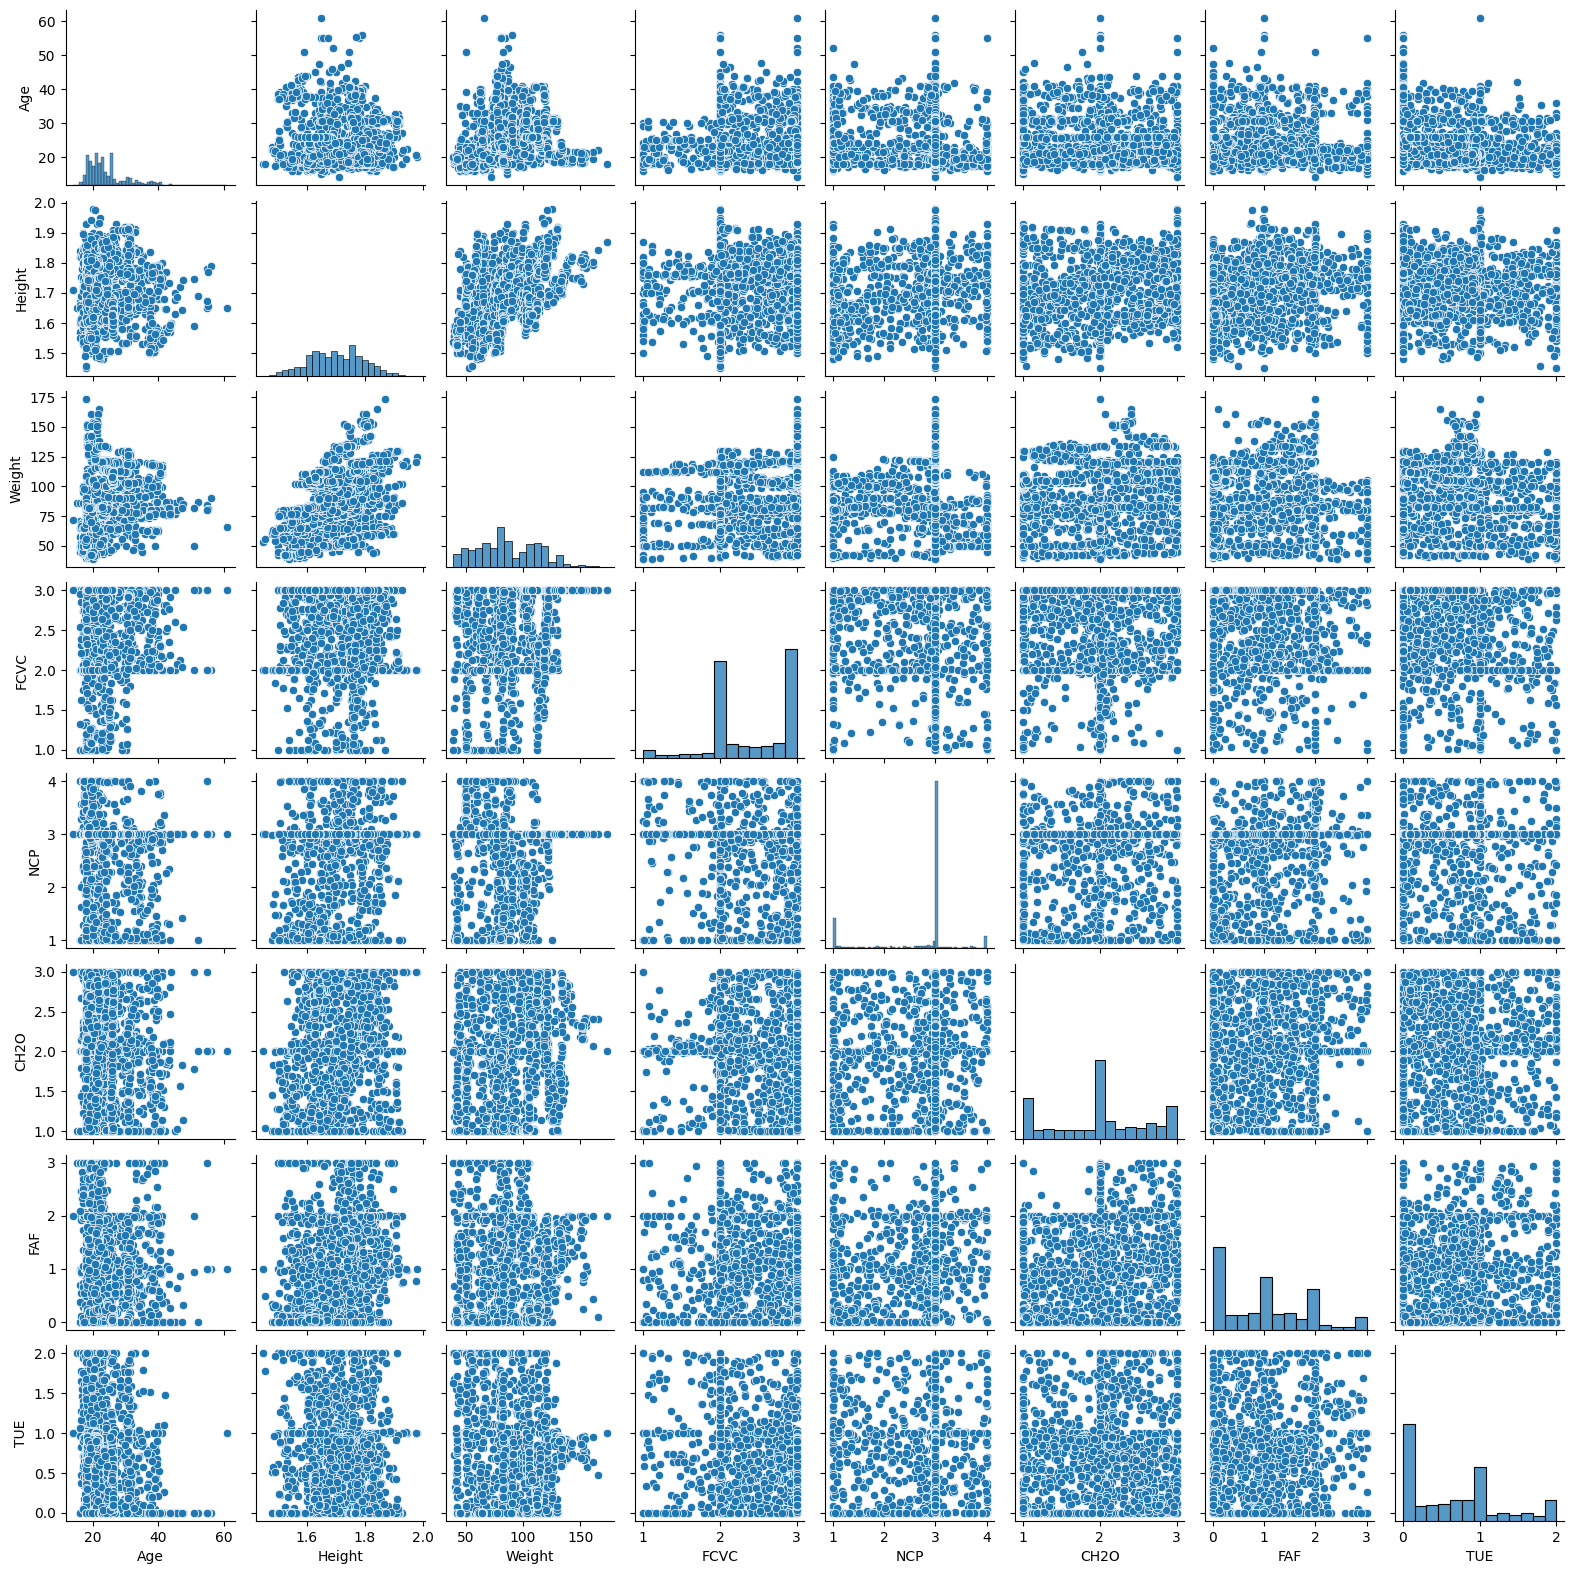

In [47]:
sns.pairplot(df, height=2)
plt.show()

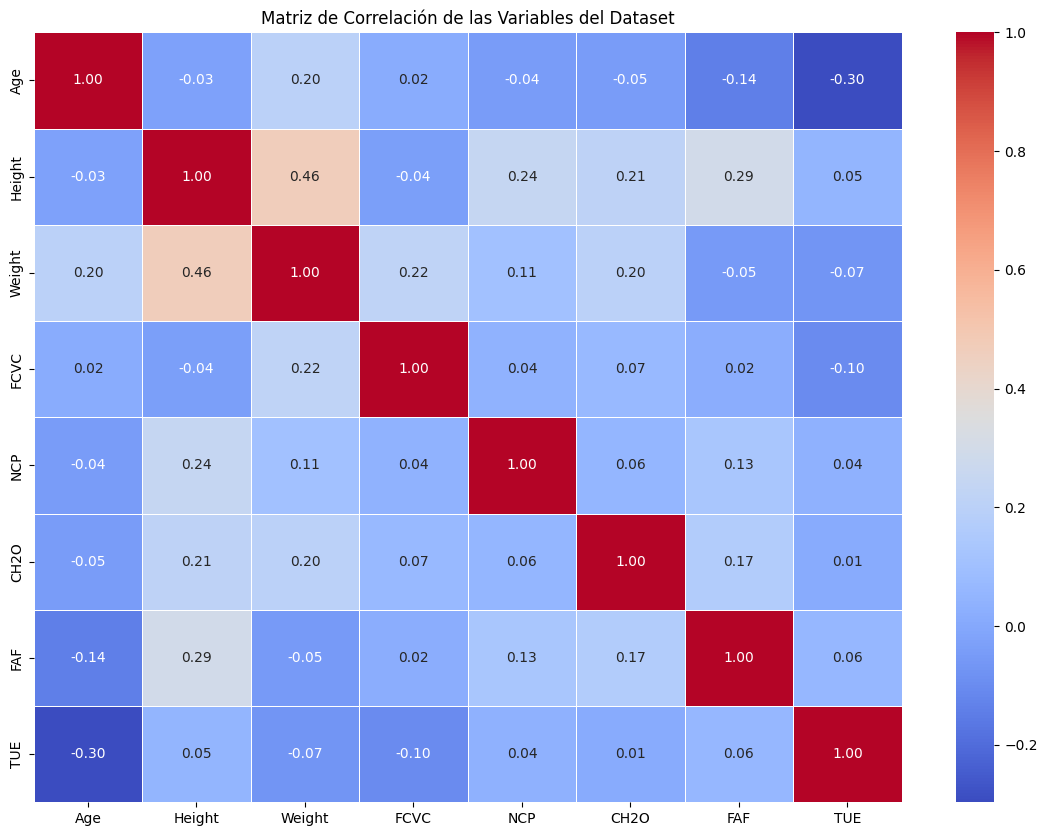

In [56]:
# Calcular la matriz de correlación
correlation_matrix = df[numericas].corr()

# Configurar el tamaño de la figura
plt.figure(figsize=(14, 10))

# Crear un mapa de calor para la matriz de correlación
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Mostrar el gráfico
plt.title("Matriz de Correlación de las Variables del Dataset")
plt.show()


Se evidencia a través de los gráficos anteriores que existe una correlación entre las variables Height y Weight.

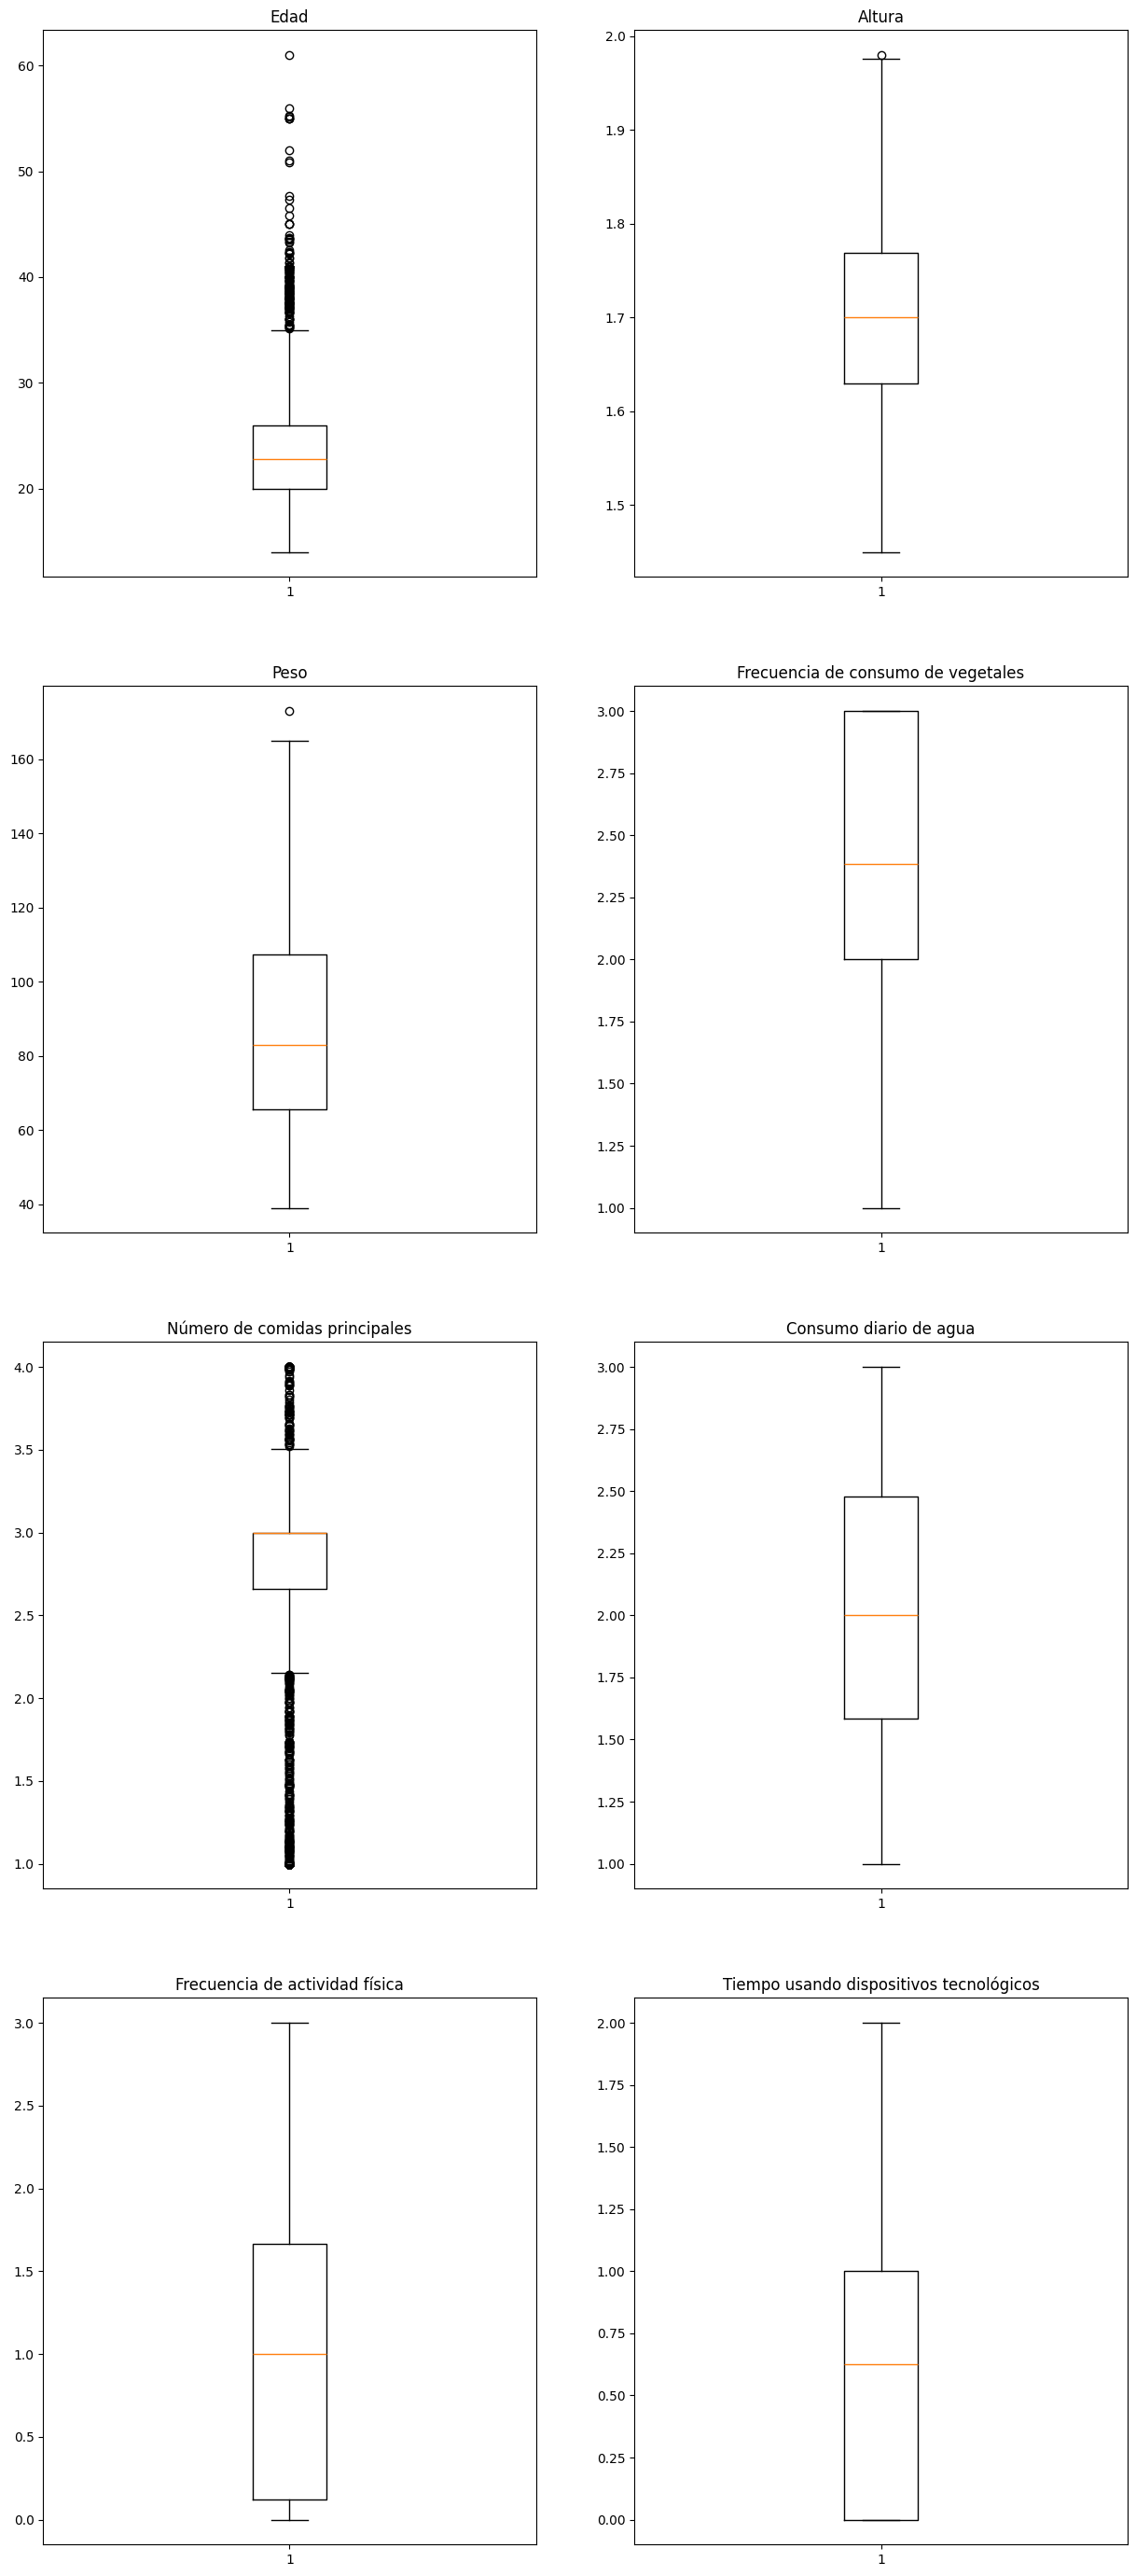

In [21]:
# Box plot
plt.figure(figsize=(15,35))
plt.subplot(4,2,1)
plt.boxplot(df.Age)
plt.title('Edad')
plt.subplot(4,2,2)
plt.boxplot(df.Height)
plt.title('Altura')
plt.subplot(4,2,3)
plt.boxplot(df.Weight)
plt.title('Peso')
plt.subplot(4,2,4)
plt.boxplot(df.FCVC)
plt.title('Frecuencia de consumo de vegetales')
plt.subplot(4,2,5)
plt.boxplot(df.NCP)
plt.title('Número de comidas principales')
plt.subplot(4,2,6)
plt.boxplot(df.CH2O)
plt.title('Consumo diario de agua')
plt.subplot(4,2,7)
plt.boxplot(df.FAF)
plt.title('Frecuencia de actividad física')
plt.subplot(4,2,8)
plt.boxplot(df.TUE)
plt.title('Tiempo usando dispositivos tecnológicos')
plt.show()

El diagrama de caja anterior representa la visualización gráfica de valores atípicos en el conjunto de datos. Tenemos valores atípicos presentes en la columna de número de comidas principales, altura, peso y edad. 

In [13]:
#Frecuencia variable objetivo
obesidad_counts=df['NObeyesdad'].value_counts()
obesidad_counts

NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64

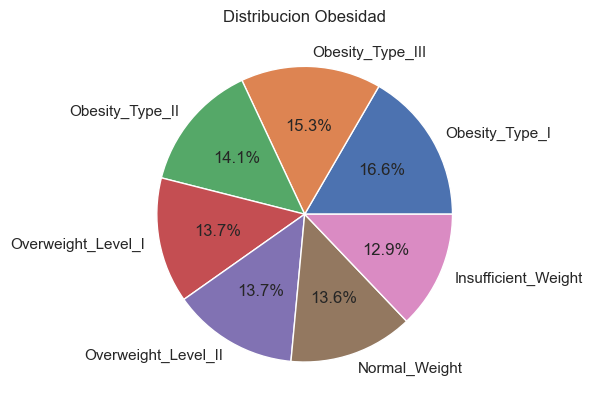

In [44]:
# Gráfico tipo pie
plt.pie(obesidad_counts, 
        labels=obesidad_counts.index, 
        autopct='%1.1f%%')
plt.title('Distribucion Obesidad')
plt.show()

Hipotesis
* H0: No hay relación entre la condición física y la obesidad.
* H1: Si hay relación entre la condición física y la obesidad.

In [53]:
#Crea copia de dataframe 
df_copy=df.drop(['Gender', 'family_history_with_overweight','SMOKE','Age', 'Height', 'Weight'], axis=1)
df_copy.columns

Index(['FAVC', 'FCVC', 'NCP', 'CAEC', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC',
       'MTRANS', 'NObeyesdad'],
      dtype='object')

In [55]:
df_copy.dtypes

FAVC           object
FCVC          float64
NCP           float64
CAEC           object
CH2O          float64
SCC            object
FAF           float64
TUE           float64
CALC           object
MTRANS         object
NObeyesdad     object
dtype: object

In [57]:
from sklearn.preprocessing import OneHotEncoder

# Separar variables numéricas y categóricas
categorical_cols = df_copy.select_dtypes(include=['object']).columns.tolist()
categorical_cols.remove('NObeyesdad')  # La variable objetivo se excluye del procesamiento aquí

# Aplicar One-Hot Encoding a las variables categóricas
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_data = encoder.fit_transform(df_copy[categorical_cols])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))

# Concatenar variables numéricas y las variables categóricas codificadas
numerical_data = df_copy.select_dtypes(include=['float64'])
processed_data = pd.concat([numerical_data, encoded_df, df_copy['NObeyesdad']], axis=1)

# Mostrar el resultado del preprocesamiento
processed_data.head()


,FCVC,NCP,CH2O,FAF,TUE,FAVC_yes,CAEC_Frequently,CAEC_Sometimes,CAEC_no,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,NObeyesdad
0,2.0,3.0,2.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,Normal_Weight
1,3.0,3.0,3.0,3.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,Normal_Weight
2,2.0,3.0,2.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,Normal_Weight
3,3.0,3.0,2.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,Overweight_Level_I
4,2.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,Overweight_Level_II


In [76]:
#preprocesamiento
from sklearn.preprocessing import StandardScaler

X = processed_data.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [114]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

# Definir k para clustering
k = 5

# Clustering K-Means
kmeans = KMeans(n_clusters=k, random_state=42)
labels_kmeans = kmeans.fit_predict(X_scaled)
silhouette_kmeans = silhouette_score(X_scaled, labels_kmeans)
print(f"Coeficiente de Silueta para K-Means: {silhouette_kmeans:.4f}")

# Clustering Jerárquico
agg = AgglomerativeClustering(n_clusters=k, linkage='ward')
labels_agg = agg.fit_predict(X_scaled)
silhouette_agg = silhouette_score(X_scaled, labels_agg)
print(f"Coeficiente de Silueta para Clustering Jerárquico: {silhouette_agg:.4f}")

# DBSCAN
dbscan = DBSCAN(eps=2, min_samples=5)
labels_dbscan = dbscan.fit_predict(X_scaled)
mask = labels_dbscan != -1
if len(set(labels_dbscan)) > 1:
    silhouette_dbscan = silhouette_score(X_scaled[mask], labels_dbscan[mask])
    print(f"Coeficiente de Silueta para DBSCAN: {silhouette_dbscan:.4f}")
else:
    print("DBSCAN no encontró clústeres distintos.")

# Modelo de Mezcla Gaussiana
gmm = GaussianMixture(n_components=k, covariance_type='full', random_state=42)
labels_gmm = gmm.fit_predict(X_scaled)
silhouette_gmm = silhouette_score(X_scaled, labels_gmm)
print(f"Coeficiente de Silueta para GMM: {silhouette_gmm:.4f}")

Coeficiente de Silueta para K-Means: 0.2515
Coeficiente de Silueta para Clustering Jerárquico: 0.2296
Coeficiente de Silueta para DBSCAN: 0.2776
Coeficiente de Silueta para GMM: 0.2515


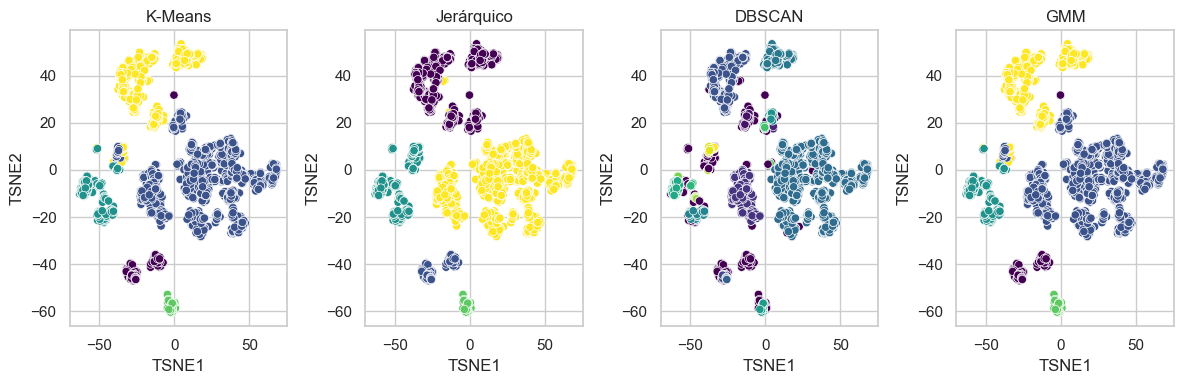

In [115]:
## Visualización de los resultados

import matplotlib.pyplot as plt
import seaborn as sns

# Crear un DataFrame con los resultados
results = pd.DataFrame({
    'K-Means': labels_kmeans,
    'Jerárquico': labels_agg,
    'DBSCAN': labels_dbscan,
    'GMM': labels_gmm
})

# Visualizar los resultados
## Hagamos un Tsne para visualizar los resultados

from sklearn.manifold import TSNE
tsne=TSNE(n_components=2, random_state=42)
X_tsne=tsne.fit_transform(X_scaled)

results['TSNE1'] = X_tsne[:,0]
results['TSNE2'] = X_tsne[:,1]

plt.figure(figsize=(12, 4))

plt.subplot(1, 4, 1)
sns.scatterplot(x='TSNE1', y='TSNE2', hue='K-Means', palette='viridis', legend=False, data=results)
plt.title('K-Means')

plt.subplot(1, 4, 2)
sns.scatterplot(x='TSNE1', y='TSNE2', hue='Jerárquico', palette='viridis', legend=False, data=results)
plt.title('Jerárquico')

plt.subplot(1, 4, 3)
sns.scatterplot(x='TSNE1', y='TSNE2', hue='DBSCAN', palette='viridis', legend=False, data=results)
plt.title('DBSCAN')

plt.subplot(1, 4, 4)
sns.scatterplot(x='TSNE1', y='TSNE2', hue='GMM', palette='viridis', legend=False, data=results)
plt.title('GMM')

plt.tight_layout()
plt.show()

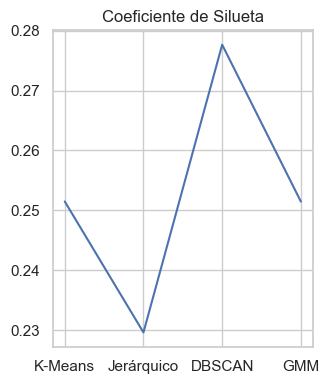

In [116]:
## Visualización de los Coeficientes de Silueta

plt.figure(figsize=(12, 4))

plt.subplot(1, 4, 1)
sns.lineplot(x=['K-Means', 'Jerárquico', 'DBSCAN', 'GMM'], y=[silhouette_kmeans, silhouette_agg, silhouette_dbscan, silhouette_gmm])

plt.title('Coeficiente de Silueta')

plt.tight_layout()
plt.show()

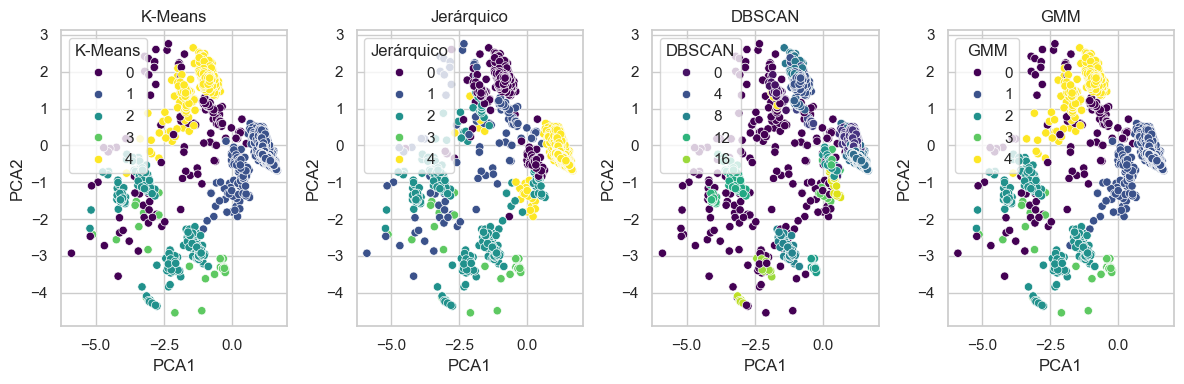

In [117]:
## Visualización de los resultados

import matplotlib.pyplot as plt
import seaborn as sns

# Crear un DataFrame con los resultados
results = pd.DataFrame({
    'K-Means': labels_kmeans,
    'Jerárquico': labels_agg,
    'DBSCAN': labels_dbscan,
    'GMM': labels_gmm
})

# Visualizar los resultados
## Hagamos un PCA para visualizar los resultados

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

results['PCA1'] = X_pca[:,0]
results['PCA2'] = X_pca[:,1]

plt.figure(figsize=(12, 4))

plt.subplot(1, 4, 1)
sns.scatterplot(x='PCA1', y='PCA2', hue='K-Means', palette='viridis',  data=results)
plt.title('K-Means')

plt.subplot(1, 4, 2)
sns.scatterplot(x='PCA1', y='PCA2', hue='Jerárquico', palette='viridis',  data=results)
plt.title('Jerárquico')

plt.subplot(1, 4, 3)
sns.scatterplot(x='PCA1', y='PCA2', hue='DBSCAN', palette='viridis',  data=results)
plt.title('DBSCAN')

plt.subplot(1, 4, 4)
sns.scatterplot(x='PCA1', y='PCA2', hue='GMM', palette='viridis',  data=results)
plt.title('GMM')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Target')

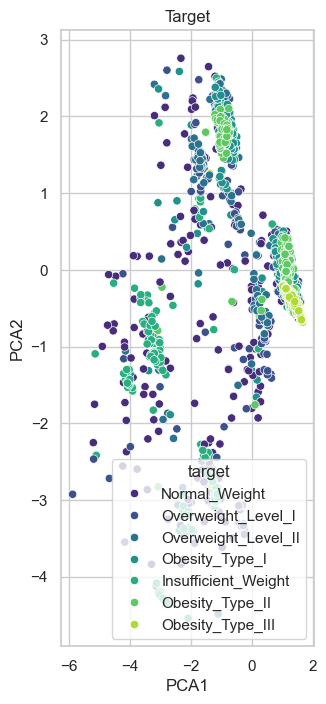

In [118]:
## Comparemos PCA con Target

results['target'] = y

plt.figure(figsize=(15, 8))

plt.subplot(1, 4, 1)
sns.scatterplot(x='PCA1', y='PCA2', hue='target', palette='viridis',  data=results)
plt.title('Target')

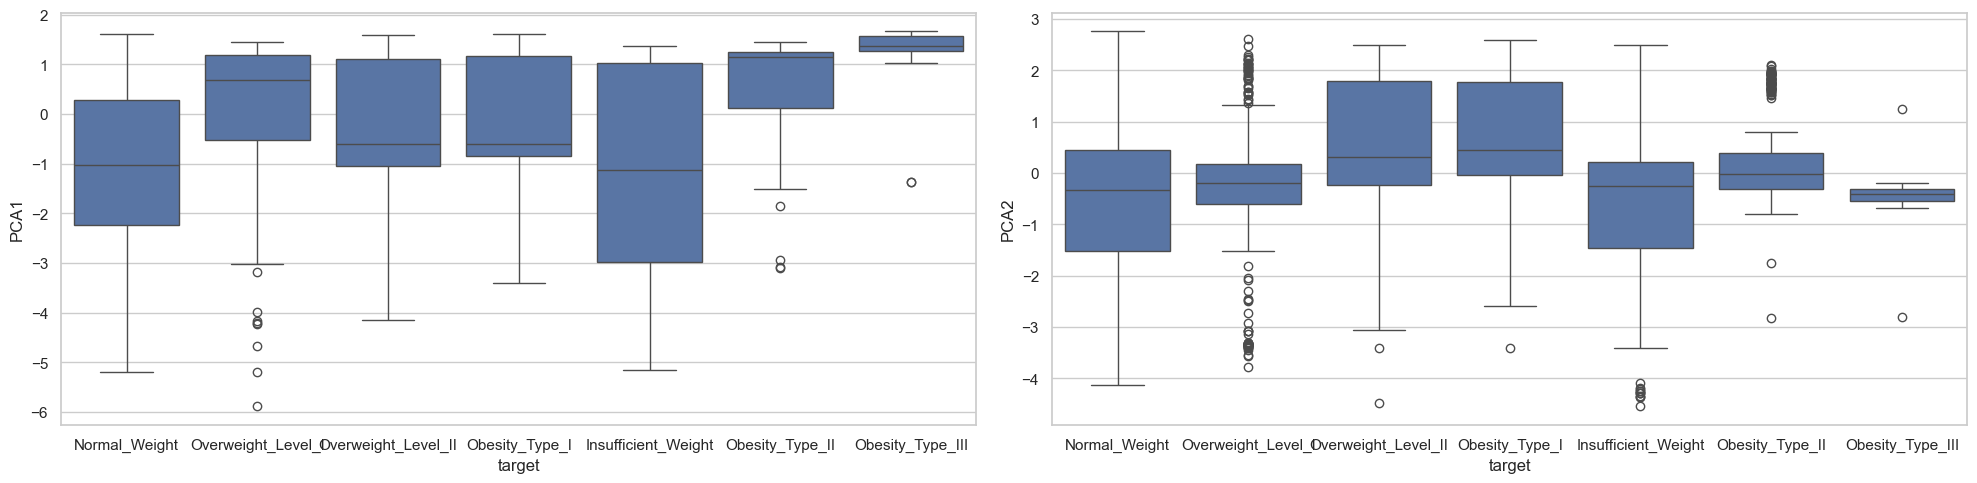

In [119]:
## Usemos un boxplot para comparar PCA con Target

plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x='target', y='PCA1', data=results)

plt.subplot(1, 2, 2)
sns.boxplot(x='target', y='PCA2', data=results)

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'K-Means')

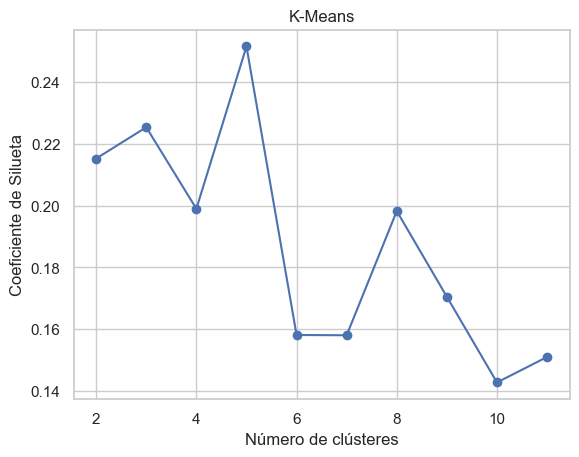

In [120]:
kmeans_silhouette = []
for k in range(10):
    kmeans = KMeans(n_clusters=k+2, random_state=42)
    labels_kmeans = kmeans.fit_predict(X_scaled)
    silhouette_kmeans = silhouette_score(X_scaled, labels_kmeans)
    kmeans_silhouette.append(silhouette_kmeans)

plt.plot(range(2, 12), kmeans_silhouette, marker='o')
plt.xlabel('Número de clústeres')
plt.ylabel('Coeficiente de Silueta')
plt.title('K-Means')